<a href="https://colab.research.google.com/github/code4tomorrow/machine-learning/blob/main/knn_walkthrough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbors Notebook

In this notebook, we will attempt to implement K-Nearest Neighbors on the classic Titanic data set, where given information about a passenger, we'll be trying to predict whether they survived or not.

## Import Libraries

First, let's implement the necessary libraries: numpy and pandas

In [3]:
import numpy as np
import pandas as pd

## Import Data

Now let's upload data into the notebook. Click the button "Choose Files" and upload the file 'Titanic.csv'

In [2]:
from google.colab import files
uploaded = files.upload()

In [ ]:
df = pd.read_csv('Titanic.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


## Drop Unusable Features

Since KNN relies on numerical features, it won't know how to deal with a person's name or their ticket number. As a result, we need to drop all of these categorical features (there are ways that we can convert a lot of these features to numerical data, but that's out of the scope of this chapter). Additionally, we will drop PassengerId because it's just an arbitrary value that's assigned chronologically.

In [ ]:
df.drop('Name', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)
df.drop('Cabin', axis=1, inplace=True)
df.drop('Embarked', axis=1, inplace=True)
df.drop('PassengerId', axis=1, inplace=True)

## Data Normalization

First, let's import StandardScaler from the sklearn preprocessing library

In [ ]:
from sklearn.preprocessing import StandardScaler

Now we can create a scaler object that uses mean and standard deviation to normalize data

In [ ]:
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)

To use the scaler, we first need to fit it to our data. Note that we drop 'Survived' because it the target variable.

In [ ]:
scaler.fit(df.drop('Survived',axis=1))

StandardScaler()

Now we can transform our data and store it in a dataframe called 'scaled_features'

In [ ]:
scaled_features = scaler.transform(df.drop('Survived',axis=1))

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = scaled_features
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Baseline Model

For now, we can build a baseline model with k=1, which we will then try to improve upon later. First, we have to import KNeighborsClassifier (or the KNN model) from the sklearn neighbors library.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Next, we create a knn model with "n_neighbors" (or k) equal to 1.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

Finally, we fit the KNN model to our train data "X_train" and "y_train".

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

Now we can use our trained model to make predictions on our test data.

In [ ]:
predictions = knn.predict(X_test)

Let's use the classification_report and confusion_matrix methods to see how well our baseline model did.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(confusion_matrix(y_test, predictions))

[[123  30]
 [ 46  69]]


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76       153
           1       0.70      0.60      0.64       115

    accuracy                           0.72       268
   macro avg       0.71      0.70      0.70       268
weighted avg       0.71      0.72      0.71       268



## Optimizations

Not bad! Now let's try to optimize our k value to improve upon our baseline model. First, we need to train a KNN model for all k values from 1-40.

In [ ]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Now, we can create a plot of the error rate for each KNN model using matplotlib.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Error Rate')

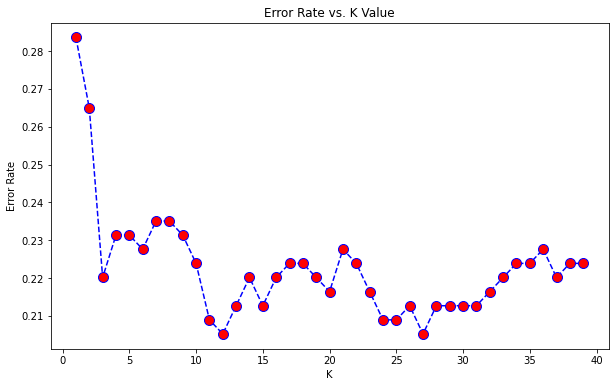

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Finally, we can create our final model using the most optimal value of k found from the elbow method.

In [ ]:
# Create a KNN model with the optimal value of k
knn = KNeighborsClassifier(n_neighbors= 12)

# Fit the KNN model to train data and create predictions on the test data
# Store your predictions in "pred"
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

# Use classification metrics to evaluate how well our optimized model does
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[142  11]
 [ 44  71]]


              precision    recall  f1-score   support

           0       0.76      0.93      0.84       153
           1       0.87      0.62      0.72       115

    accuracy                           0.79       268
   macro avg       0.81      0.77      0.78       268
weighted avg       0.81      0.79      0.79       268

